In [ ]:
# !pip install umap-learn
# !pip install hdbscan

In [1]:
# Data Science Tools
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import TCRscape

# Dimension reduction and clustering libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
import hdbscan

pd.options.mode.chained_assignment = None

In [2]:
Group_1_1 = TCRscape.ReadRhapsody('./SampleTag07_hs_RSEC_MolsPerCell_MEX','Group 1')
Group_1_2 = TCRscape.ReadRhapsody('./SampleTag10_hs_RSEC_MolsPerCell_MEX','Group 1')

Group_2_1 = TCRscape.ReadRhapsody('./SampleTag01_hs_RSEC_MolsPerCell_MEX','Group 2')
Group_2_2 = TCRscape.ReadRhapsody('./SampleTag12_hs_RSEC_MolsPerCell_MEX','Group 2')

Group_3_1 = TCRscape.ReadRhapsody('./SampleTag08_hs_RSEC_MolsPerCell_MEX','Group 3')
Group_3_2 = TCRscape.ReadRhapsody('./SampleTag09_hs_RSEC_MolsPerCell_MEX','Group 3')

In [3]:
merged = TCRscape.MergeRhapsody([Group_1_1,Group_1_2,Group_2_1,Group_2_2,Group_3_1,Group_3_2])
merged

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,IL25,S100A12,THBD,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,7,0,0,0,9,0,0,0,1.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,7,0,0,1,3,0,6,0,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,1,0,0,0,0,0,10,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,7,0,0,3,6,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0,0,0,6,3,0,1,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,8,0,0,1,4,0,8,0,0.0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56532319,1,0,0,0,0,0,12,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56565145,5,0,0,0,3,0,9,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
norm =  TCRscape.LogNormalize(merged)
norm

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
T = TCRscape.GateTcells(norm)
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
CD4 = TCRscape.GateCD4(T)
CD4

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
77731,0.000000,0.000000,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
201392,5.266819,0.000000,0.0,0.000000,6.183109,0.0,6.653113,0.0,0.0,4.573672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
457038,5.648111,0.000000,0.0,0.000000,5.109115,0.0,6.107644,0.0,0.0,3.856352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468184,6.094605,4.015164,0.0,0.000000,7.150658,0.0,4.708311,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
534585,5.530430,0.000000,0.0,0.000000,6.417733,0.0,5.530430,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55823501,0.000000,0.000000,0.0,4.403046,5.789340,0.0,5.789340,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56389437,5.319541,0.000000,0.0,0.000000,6.928979,0.0,6.418153,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56390205,4.730167,0.000000,0.0,0.000000,6.601969,0.0,5.982930,0.0,0.0,4.037019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
CD8 = TCRscape.GateCD8(T)
CD8

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
AIRR = pd.read_csv("Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)

AIRR['cell_id'] = AIRR['cell_id'].dropna()
AIRR['locus'] = AIRR['locus'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)
AIRR['cdr3_aa'] = AIRR['cdr3_aa'].dropna()
AIRR['sequence_aa'] = AIRR['sequence_aa'].astype(str)

AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,25,T_CD8_memory,False,TRB,25_TRB_7,467,2,TTGTTTTGTTTTGTTTGTTAAGCTCTTTCCTGGACTCTTTCTACAG...,485,CFVLFVKLFPGLFLQHLFLSLTDSFHAKVTQTPGHLVKGKGQKTKM...,...,CTTCAAGAAACGGAGATGCACAAGAAGCGATTCTCATCTCAATGCC...,LQETEMHKKRFSSQCPKNAPCSLAILSSEPGDTALYLC,TTTGGTGATGGGACTCGACTCTCCATCCTA,W*WDSTLHP,AAAGGACATACTTTT,KGHTF,TTTCAGAATGAACAAGTT,FQNEQV,GCCAGCAGTCACCCGGTGGGGGCGAAATCAGCCCCAGCAT,ASSHPVGAKSAPA
1,1454,T_CD8_memory,True,TRB,1454_TRB_1,284,6,GGGATGCTTACTACAGAGACACCAGCCCCAAGCTAGGAGATCCTGC...,506,DAYYRDTSPKLGDPAMGFRLLCCVAFCLLGAGPVDSGVTQTPKHLI...,...,AGAGCAAAAGGAAACATTCTTGAACGATTCTCCGCACAACAGTTCC...,RAKGNILERFSAQQFPDLHSELNLSSLELGDSALYFC,TTCGGGCCGGGCACCAGGCTCACGGTCACA,FGPGTRLTVT,TCTGGAGACCTCTCT,SGDLS,TATTATAATGGAGAAGAG,YYNGEE,GCCAGCAGCGTAGCTTACAGGGGCCACGAGCAGTAC,ASSVAYRGHEQY
2,3606,T_CD8_memory,True,TRA,3606_TRA_1,7945,26,TATGGAGAGTTGAGGGTGAATTTACAGAGTTTCAGCTGGTTGGGAA...,603,YGELRVNLQSFSWLGRLEDHLGCH*ALVPGGMDKILGASFLVLWLQ...,...,AAGAAAGAAGGAAGATTCACAATCTCCTTCAATAAAAGTGCCAAGC...,KKEGRFTISFNKSAKQFSLHIMDSQPGDSATYFC,TTTGGAACTGGAACAAAGCTCCAAGTCATCCCA,FGTGTKLQVIP,AACACTGCGTTTGACTAC,NTAFDY,ATACGTCCAGATGTGAGTGAA,IRPDVSE,GCAGCAAGCAAGTCTGGGGGTTACCAGAAAGTTACC,AASKSGGYQKVT
3,3606,T_CD8_memory,True,TRB,3606_TRB_1,3208,27,GGAATTGTTGTTAATTCAAGGTTTAAGTCCCTTGTCTTTGGGGTTG...,571,ELLLIQGLSPLSLGLLFGGAPAHSDPDLVKLPSCPDPAMGTRLLFW...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGACAAGGCACCAGACTCACAGTTGTA,FGQGTRLTVV,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCGTTCAGGGAACTGAAGCTTTC,ASSVQGTEAF
4,3866,T_CD8_memory,True,TRA,3866_TRA_1,616,7,GTATGGGGATTTTTATTAATAATCTTGTGGATGCAGCTGACATGGG...,465,VWGFLLIILWMQLTWVSGQQLNQSPQSMFIQEGEDVSMNCTSSSIF...,...,ACCTCAAATGGAAGACTGACTGCTCAGTTTGGTATAACCAGAAAGG...,TSNGRLTAQFGITRKDSFLNISASIPSDVGIYFC,TTTGGAGCCGGAACCACAGTAACTGTAAGAGCA,FGAGTTVTVRA,AGCATATTTAACACC,SIFNT,TTATATAAGGCTGGTGAATTG,LYKAGEL,GCTGGGCAGCGCGACTACAAGCTCAGC,AGQRDYKLS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38913,56615650,Natural_killer,False,TRD,56615650_TRD_1,291,5,AGCAACTCTAGTTATTCTTTTTATGTATGGGGACTGAACTTTGAGC...,602,SNSSYSFYVWGLNFELQAAQLTFVQRATCHMLFSSLLCVFVAFSYS...,...,GATGAACAGAATGCAAAAAGTGGTCGCTATTCTGTCAACTTCAAGA...,DEQNAKSGRYSVNFKKAAKSVALTISALQLEDSAKYFC,TTTGGAAAAGGAACCCGTGTGACTGTGGAACCA,FGKGTRVTVEP,ACAAGTTGGTGGTCATATTAT,TSWWSYY,CAGGTTTCT,QVS,GCTCTTGGGGAACTAGGGCCACCCCTACTGGGTGCTAACACCGATA...,ALGELGPPLLGANTDKLI
38914,56615879,T_CD8_memory,True,TRA,56615879_TRA_1,6953,38,GGGAGACTGAGTTTCCTTCCCTCACCCACATGAAGTGTCTACCTTC...,570,GRLSFLPSPT*SVYLLQTPMAQELGMQCQARGILQQMWGVFLLYVS...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTTGGAGATGGAACTCAGCTGGTGGTGAAGCCC,FGDGTQLVVKP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTGTTAATAACAATGCCAGACTCATG,AVNNNARLM
38915,56615879,T_CD8_memory,True,TRB,56615879_TRB_1,37294,91,GTATGGGGGCCCTTTTCACCAATGCACAGACCCAGAGGACCCCTCC...,528,VWGPFSPMHRPRGPLHPAVPAMSLGLLCCGAFSLLWAGPVNAGVTQ...,...,ACTGCCAAAGGAGAGGTCCCTGATGGCTACAATGTCTCCAGATTAA...,TAKGEVPDGYNVSRLKKQNFLLGLESAAPSQTSVYFC,TTTGGACAAGGCACCAGACTCACAGTTGTA,FGQGTRLTVV,ATGAACCATGAATAC,MNHEY,TCAGTTGGTGAGGGTACA,SVGEGT,GCCAGCAGACCCCCAGGACAGGGGGCGAACACTGAAGCTTTC,ASRPPGQGANTEAF
38916,56619358,T_CD8_memory,True,TRA,56619358_TRA_1,322,9,GGGAGTGATGCCCTCTGCTAGGCCAGAGACACTAACAATGAACTCC...,490,GVMPSARPETLTMNSSLDFLILILMFGGTSSNSVKQTGQITVSEGA...,...,AACAGCAAAAACTTCGGAGGCGGAAATATTAAAGACAAAAACTCCC...,NSKNFGGGNIKDKNSPIVKYSVQVSDSAVYYC,TTTGGCGCAGGAACCATTCTGAGAGTCAAGTCC,FGAGTILRVKS,TCCACGGGGTACCCTACC,STGYPT,GAGACAATGGAA,ETME,CTTCTGGAATATGGAAACAAGCTGGTC,LLEYGNKLV


In [9]:
Group_1_T = T[T['Sample_Group 1'] == 1]
Group_2_T = T[T['Sample_Group 2'] == 1]
Group_3_T = T[T['Sample_Group 3'] == 1]

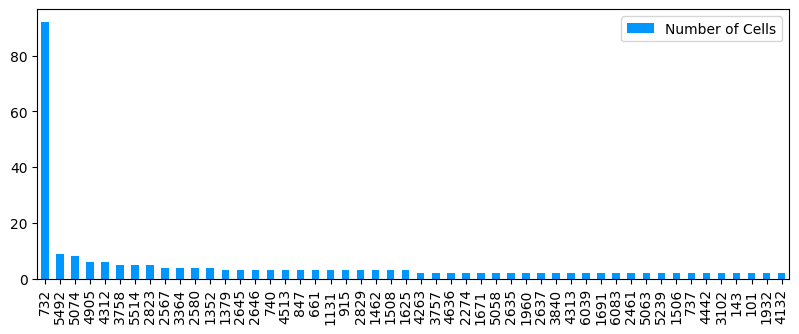

In [10]:
Counts = TCRscape.CountClonotypes(Group_1_T, AIRR)

# Visualize and save Top 50 Clonotypes
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('Clonotype Counts.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('Clonotype Counts.csv')
plt.show()

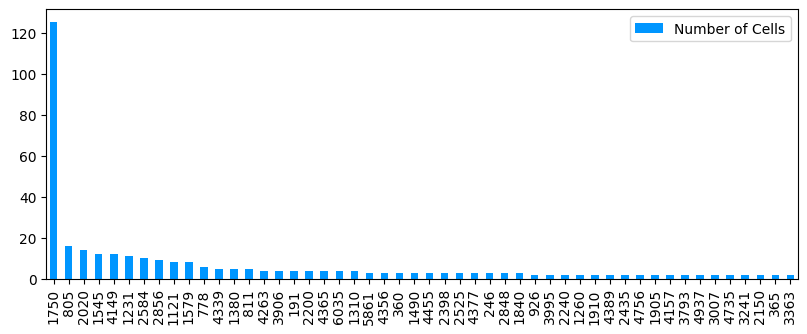

In [11]:
Counts = TCRscape.CountCDR3(Group_1_T, AIRR)

# Visualize and save Top 50 CDR3-types
vis = Counts.iloc[:50,:]
vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('CDR3 Counts.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('Clonotypes.xlsx')
Counts.to_csv('CDR3 Counts.csv')
plt.show()

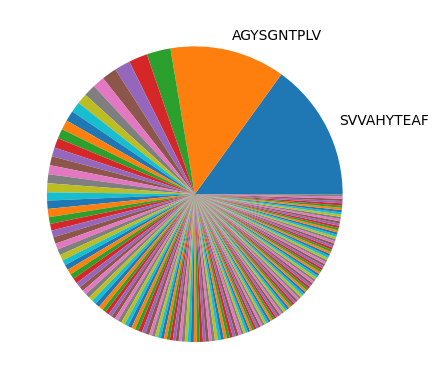

In [12]:
# CDR3 filter - minimum number of cells with the same CDR3 
min_CDR3 = 3

# Optional - Remove non top-X CDR3s
CDR3_top = 2

Pie = TCRscape.CDR3pie(Group_1_T, AIRR, min_CDR3, CDR3_top)

In [13]:
T

,ADA,ADGRE1,ADGRG3,AIM2,ANXA5,AOC3,APOBEC3G,AQP9,ARG1,ARL4C,...,TREM1,VPREB3,CCL2,BPI,CCR10,CD1B,PI3,Sample_Group 1,Sample_Group 2,Sample_Group 3
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,6.080452,0.0,0.0,0.000000,6.331766,0.0,0.000000,0.0,4.134542,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56865,6.345694,0.0,0.0,4.399783,5.498396,0.0,6.191543,0.0,0.000000,5.092931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59557,4.863941,0.0,0.0,0.000000,0.000000,0.0,7.166526,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
61317,5.473011,0.0,0.0,4.625713,5.318860,0.0,5.724325,0.0,0.000000,3.527101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
77731,0.000000,0.0,0.0,6.063319,5.370171,0.0,4.271559,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,6.224027,0.0,0.0,4.144586,5.530880,0.0,6.224027,0.0,0.000000,5.243198,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56532319,4.295482,0.0,0.0,0.000000,0.000000,0.0,6.780389,0.0,0.000000,4.295482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
56565145,5.847884,0.0,0.0,0.000000,5.337058,0.0,6.435670,0.0,0.000000,4.238446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
# Minimum clonotypes
min_clones = 1

# Featurs to use for clustering
features_to_cluster = ['CD4', 'CD8A', 'NKG7', # T-cell type
                       'FOXP3',  # Treg
                       # 'SELL','IL7R','CCR7', 'IFNG', 'IL2RA', # T-cell type markers
                       'Sample_Group 1','Sample_Group 2','Sample_Group 3'
                      ]

In [15]:
df = TCRscape.TCRscape(T, AIRR, features_to_cluster, min_clones)
df

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV2*03,TRDV_TRDV3*01,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0.000000,7.660902,7.078981,0.000000,1.0,0.0,0.0,92,1,0,...,0,0,0,0,0,0,0,0,0,0
56865,0.000000,7.535278,6.479225,0.000000,1.0,0.0,0.0,92,1,0,...,0,0,0,0,0,0,0,0,0,0
61317,0.000000,7.288301,6.822938,3.527101,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
88775,0.000000,7.671868,8.103799,3.899107,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
201392,5.672284,4.573672,7.406885,0.000000,1.0,0.0,0.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,0.000000,7.235628,6.447171,0.000000,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
56532319,0.000000,6.934539,7.340004,4.988629,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
56565145,0.000000,7.011035,6.435670,0.000000,0.0,0.0,1.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


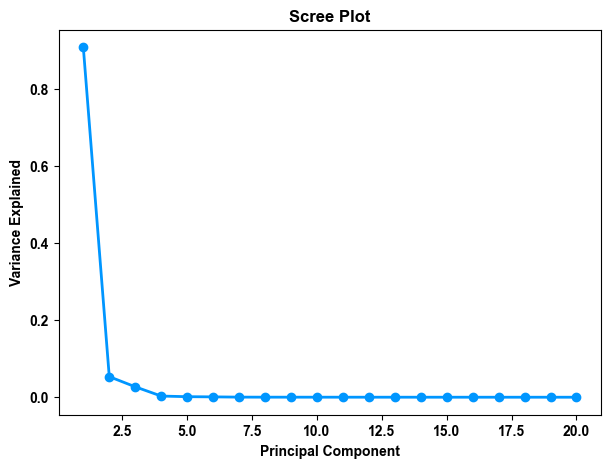

In [24]:
X = df.drop(columns=['Sample_Group 1', 'Sample_Group 2', 'Sample_Group 3']) # Remove the meta data
# X = StandardScaler().fit_transform(X) # Gives bad clusters sometimes

# Plot background color
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'

# PCA
pca = PCA(n_components=20)
pca_fit = pca.fit(X.T)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(7,5))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#0096FF')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot.png', dpi=600, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/opt/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_51520/1391967424.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


Text(0, 0.5, 'UMAP 2')

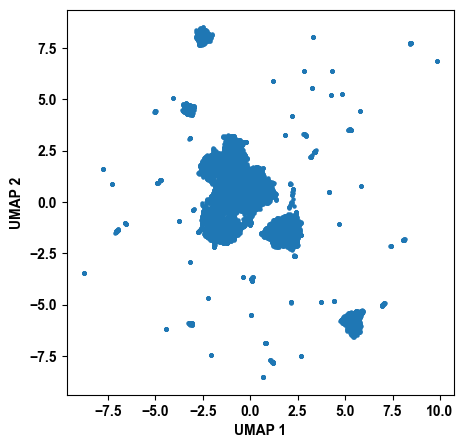

In [25]:
n_components = 5 # From the Scree Plot

# UMAP
clusterable_embedding = umap.UMAP(
                                  n_neighbors=5,
                                  min_dist=0.1,
                                  n_components=n_components,
                                  random_state=14,
                                 ).fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=5, cmap='Spectral')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

In [26]:
# Run HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5)
cluster_labels = clusterer.fit_predict(clusterable_embedding)
df['Cluster'] = cluster_labels

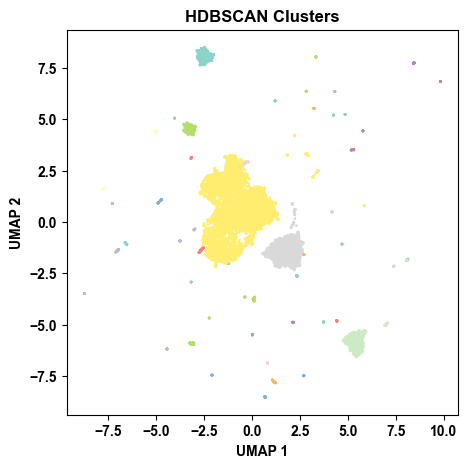

In [27]:
#UMAP Cluster plot

feature = df["Cluster"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "Set3", s = 1)

plt.title("HDBSCAN Clusters")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Clusters.png', dpi=600, bbox_inches='tight')

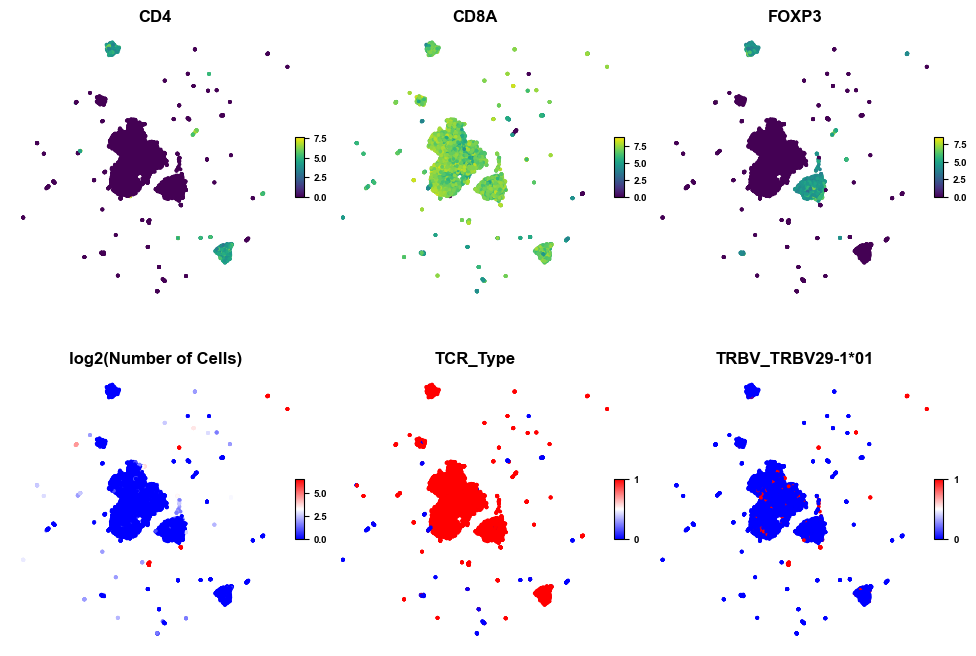

In [28]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker

plot_df = df.copy()

# Log2 transform 'Number of Cells' for better resolution
plot_df['log2(Number of Cells)'] = np.log2(plot_df['Number of Cells'])

# List of features to plot
features = ['CD4', 'CD8A', 'FOXP3',
            'log2(Number of Cells)', 'TCR_Type', "TRBV_TRBV29-1*01"]

# Assign colormaps per feature
cmaps = {
    'log2(Number of Cells)': 'bwr',
    'CD4': 'viridis',
    'CD8A': 'viridis',
    'FOXP3': 'viridis',
    'TCR_Type': 'bwr',
    "TRBV_TRBV29-1*01": 'bwr'
}

# Grid layout
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

# Set font globally
plt.rcParams.update({
    'font.family': 'Arial',
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titleweight': 'bold',
    'axes.titlesize': 12
})

# Plot each feature
for i, feature_name in enumerate(features):
    values = plot_df[feature_name]
    cmap = cmaps.get(feature_name, 'viridis')

    ax = axes[i]

    # Set up inset colorbar axis first
    cax = inset_axes(ax,
                     width="3.3%",        
                     height="22%",         
                     loc='center right',
                     borderpad=-0.25)
    
    # Detect range
    vmin = values.min()
    vmax = values.max()

    # Plot scatter
    sc = ax.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
                    c=values, cmap=cmap, s=3)

    # Create colorbar
    cb = plt.colorbar(sc, cax=cax, orientation='vertical')

    cb.ax.tick_params(labelsize=7)  # tick font size

    # Smart logic for ticks
    if vmax <= 1:
        cb.set_ticks([0, 1])
    else:
        cb.locator = ticker.MultipleLocator(base=2.5)
    cb.update_ticks()

    # Clean up axis
    ax.set_title(feature_name, fontsize=12)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust spacing between plots
plt.subplots_adjust(wspace=0.1, hspace=0.25)

# Save figure
plt.savefig('TCRscape UMAP.png', dpi=600, bbox_inches='tight')
plt.show()

## Export clonotype data per Sample to Seurat

In [53]:
sample = Group_1_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_1_1 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
50084,0.0,7.660902,7.078981,0.000000,1.0,0.0,0.0,92.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56865,0.0,7.535278,6.479225,0.000000,1.0,0.0,0.0,92.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59557,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61317,0.0,7.288301,6.822938,3.527101,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77731,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56532160,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56535597,0.0,7.430415,7.338042,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56544070,0.0,7.475287,7.395244,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
sample = Group_1_2

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_1_2 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
6449,0.000000,7.566370,6.594510,3.955453,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12516,0.000000,7.184587,6.172986,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14872,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21117,0.000000,7.741981,6.183836,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28836,0.000000,7.010650,6.422863,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56608620,0.000000,7.556886,8.163021,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56614258,0.000000,6.651392,7.093225,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56614276,3.902073,7.080127,7.996417,0.000000,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
sample = Group_2_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_2_1 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
1454,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3866,0.0,7.038117,7.038117,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7880,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23743,0.0,7.494742,7.207060,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39654,0.0,6.952056,7.032098,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56473587,0.0,6.878196,7.060518,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56509292,0.0,6.295818,3.993233,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56513804,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
sample = Group_2_2

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_2_2 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
25,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3606,0.0,7.813683,6.021924,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12936,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20352,0.0,6.804683,5.551920,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54938,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56590952,0.0,7.500646,5.795898,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56593937,0.0,8.099064,6.518613,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56598104,0.0,7.971114,6.747339,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
sample = Group_3_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_3_1 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
13140,3.803617,7.467179,6.894660,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35125,0.000000,6.907255,7.672723,3.911523,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62591,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196686,6.512341,4.720581,7.118476,6.330019,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207504,4.663329,7.228278,7.371379,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56417735,4.286716,6.232627,6.483941,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56469453,0.000000,6.429040,6.429040,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56509022,0.000000,6.786644,6.498962,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
sample = Group_3_2

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,df,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype = sample_clonotype[~sample_clonotype.index.duplicated(keep='first')]
sample_clonotype.to_csv('Group_3_2 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_Group 1,Sample_Group 2,Sample_Group 3,Number of Cells,TCR_Type,Clonotype_TRA_AAKQEVTQIPAALSVPEGENLVLNCSFTDSAIYNLQWFRQDPGKGLTSLLLIQSSQREQTSGRLNASLDKSSGRSTLYIAASQPGDSATYLCAAPDIADGLTFGKGTHLIIQPYIQKPDPAVYQLRDSKSSDKSVCLFTDFD___TRB_MGIRLLCRVAFCFLAVGLVDVKVTQSSRYLVKRTGEKVFLECVQDMDHENMFWYRQDPGLGLRLIYFSYDVKMKEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLCASSFDGRATGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,...,TRDV_TRDV3*02,TRDD_TRDD2*01,TRDD_TRDD3*01,TRDJ_TRAJ18*01,TRDJ_TRAJ39*01,TRDJ_TRAJ44*01,TRDJ_TRDJ1*01,TRDJ_TRDJ2*01,TRDJ_TRDJ3*01,TRDJ_TRDJ4*01
Cell_Index,,,,,,,,,,,,,,,,,,,,,
31517,4.458908,7.061597,7.231496,5.711671,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37389,0.000000,7.074203,7.361886,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43716,0.000000,5.477444,8.185494,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54029,0.000000,6.804397,7.172122,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65013,0.000000,7.933245,6.645391,4.565949,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56530650,0.000000,7.235628,6.447171,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56532319,0.000000,6.934539,7.340004,4.988629,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56565145,0.000000,7.011035,6.435670,0.000000,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
